In [1]:
import os
import sys
import random
import math

import numpy as np
import matplotlib.pyplot as plt
import skimage.io

from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize

Using TensorFlow backend.


In [2]:
ROOT_DIR = os.path.abspath("/")

sys.path.append(ROOT_DIR)

MODEL_DIR = "logs"

from coco import CocoConfig

COCO_MODEL_PATH = "mask_rcnn_coco.h5"

In [3]:
class InferenceConfig(CocoConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MAX_GT_INSTANCES               100
MEAN_PIXEL                     [123.7 116.8 103.9

In [4]:
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

W0409 13:46:23.039355 139783113426752 deprecation_wrapper.py:119] From /home/cleanpegasus/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4070: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0409 13:46:26.442676 139783113426752 deprecation_wrapper.py:119] From /home/cleanpegasus/Documents/Projects/Deep Learning Projects/Art-me/mrcnn/model.py:338: The name tf.log is deprecated. Please use tf.math.log instead.

W0409 13:46:26.455306 139783113426752 deprecation.py:323] From /home/cleanpegasus/Documents/Projects/Deep Learning Projects/Art-me/mrcnn/model.py:396: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0409 13:46:26.464540 139783113426752 deprecation.py:506] From /home/cleanpegasus/Documents/Projects/Deep Learning Projects/Art-me/mrcnn/model.py:420: calli

In [5]:
model.load_weights(COCO_MODEL_PATH, by_name=True)

In [6]:
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

In [7]:
image = skimage.io.imread("sample.jpeg")

results = model.detect([image], verbose = 1)

Processing 1 images
image                    shape: (333, 500, 3)         min:    0.00000  max:  255.00000  uint8


W0409 13:46:35.699993 139783113426752 deprecation_wrapper.py:119] From /home/cleanpegasus/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


In [8]:
mask_image = results[0]['masks']

In [9]:
print(mask_image.shape)

(333, 500, 1)


In [10]:
print(image.shape)

(333, 500, 3)


In [11]:
import cv2

In [12]:
result_image = image*mask_image

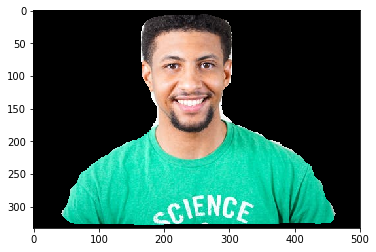

In [13]:
plt.imshow(result_image)

In [39]:
background = skimage.io.imread('background.jpg')

In [40]:
background = background[:result_image.shape[0], :result_image.shape[1]]

In [41]:
masked_background = background * np.bitwise_not(mask_image)

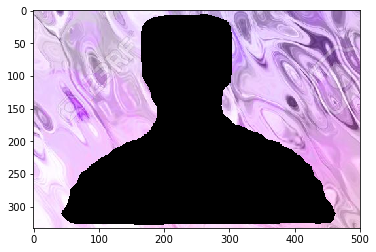

In [42]:
plt.imshow(masked_background)

In [43]:
net_result = masked_background + result_image

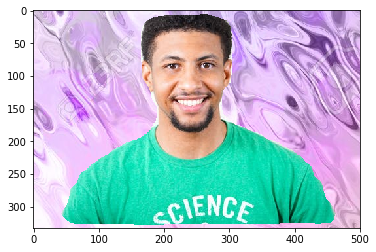

In [44]:
plt.imshow(net_result)